In [1]:
import shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, f_oneway
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    cohen_kappa_score
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE


Missing Values in Each Column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Health_Risk_Index       0
Lifestyle_Score         0
Chronic_Conditions      0
dtype: int64


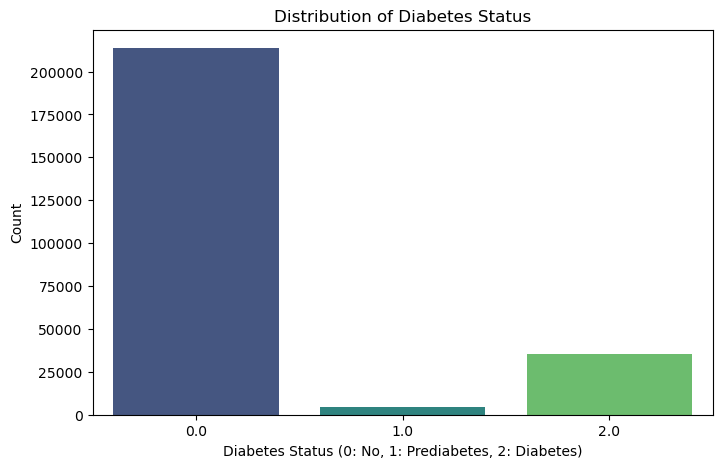

In [3]:
# Load the dataset
diabetes_data = pd.read_csv('diabetes-110PP.csv')

# Add engineered features at the beginning
diabetes_data['Health_Risk_Index'] = (
    0.4 * diabetes_data['BMI'] + 
    0.3 * diabetes_data['HighBP'] + 
    0.2 * diabetes_data['HighChol'] - 
    0.1 * diabetes_data['PhysActivity']
)

diabetes_data['Lifestyle_Score'] = (
    diabetes_data['Fruits'] + 
    diabetes_data['Veggies'] - 
    diabetes_data['Smoker'] - 
    diabetes_data['HvyAlcoholConsump']
)

diabetes_data['Lifestyle_Score'] = (
    (diabetes_data['Lifestyle_Score'] - diabetes_data['Lifestyle_Score'].min()) /
    (diabetes_data['Lifestyle_Score'].max() - diabetes_data['Lifestyle_Score'].min())
)

diabetes_data['Chronic_Conditions'] = (
    diabetes_data['Stroke'] + 
    diabetes_data['HeartDiseaseorAttack'] + 
    diabetes_data['DiffWalk']
)

# Check for missing values
print("\nMissing Values in Each Column:")
print(diabetes_data.isnull().sum())

# Visualize the distribution of the target variable (Diabetes_012)
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_012', data=diabetes_data, palette='viridis')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status (0: No, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Count')
plt.show()

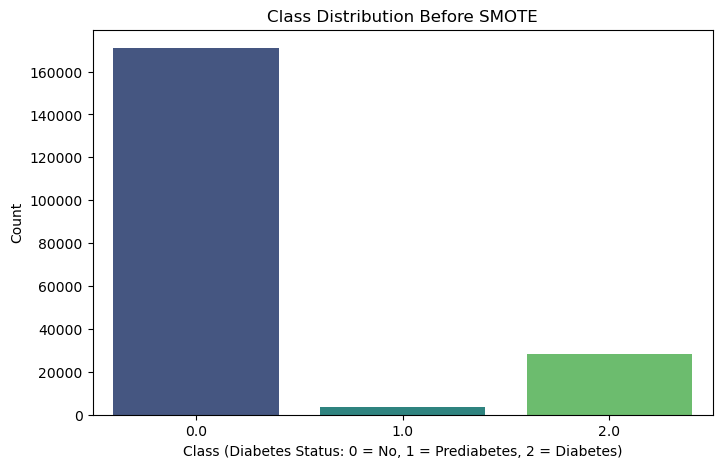

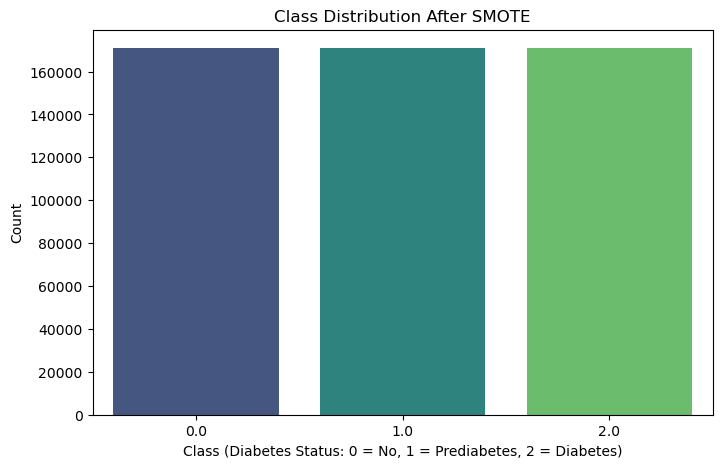

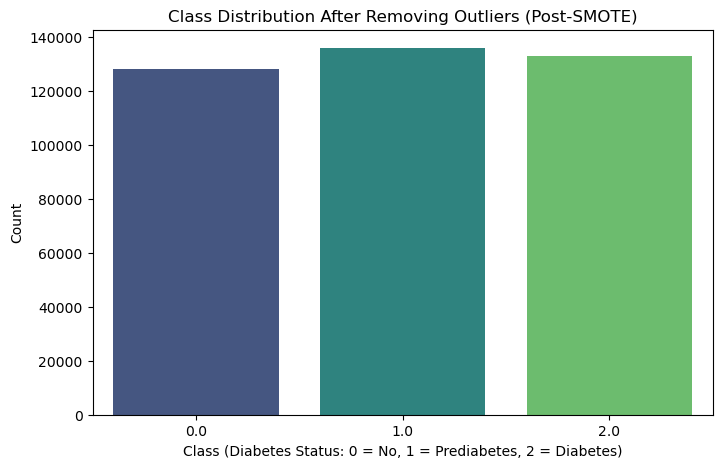

In [4]:
# Split features and target
X = diabetes_data.drop('Diabetes_012', axis=1)
y = diabetes_data['Diabetes_012']

# Split into pre-SMOTE train/test sets
X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_post, y_train_post = smote.fit_resample(X_train_pre, y_train_pre)

# Detect Outliers in Post-SMOTE Dataset
def detect_outliers(X_train_resampled, threshold=3):
    z_scores = X_train_resampled.apply(zscore)  # Compute z-scores for all numeric columns
    outliers = (z_scores.abs() > threshold).any(axis=1)  # Identify rows with z-scores > threshold
    return outliers

# Detect and remove outliers
outliers = detect_outliers(X_train_post)
X_train_post_no_outliers = X_train_post[~outliers]
y_train_post_no_outliers = y_train_post[~outliers]

# Plot class distributions for pre-SMOTE, post-SMOTE, and post-SMOTE no outliers datasets
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y, palette='viridis')
    plt.title(title)
    plt.xlabel('Class (Diabetes Status: 0 = No, 1 = Prediabetes, 2 = Diabetes)')
    plt.ylabel('Count')
    plt.show()

# Visualize distributions
plot_class_distribution(y_train_pre, title="Class Distribution Before SMOTE")
plot_class_distribution(y_train_post, title="Class Distribution After SMOTE")
plot_class_distribution(y_train_post_no_outliers, title="Class Distribution After Removing Outliers (Post-SMOTE)")

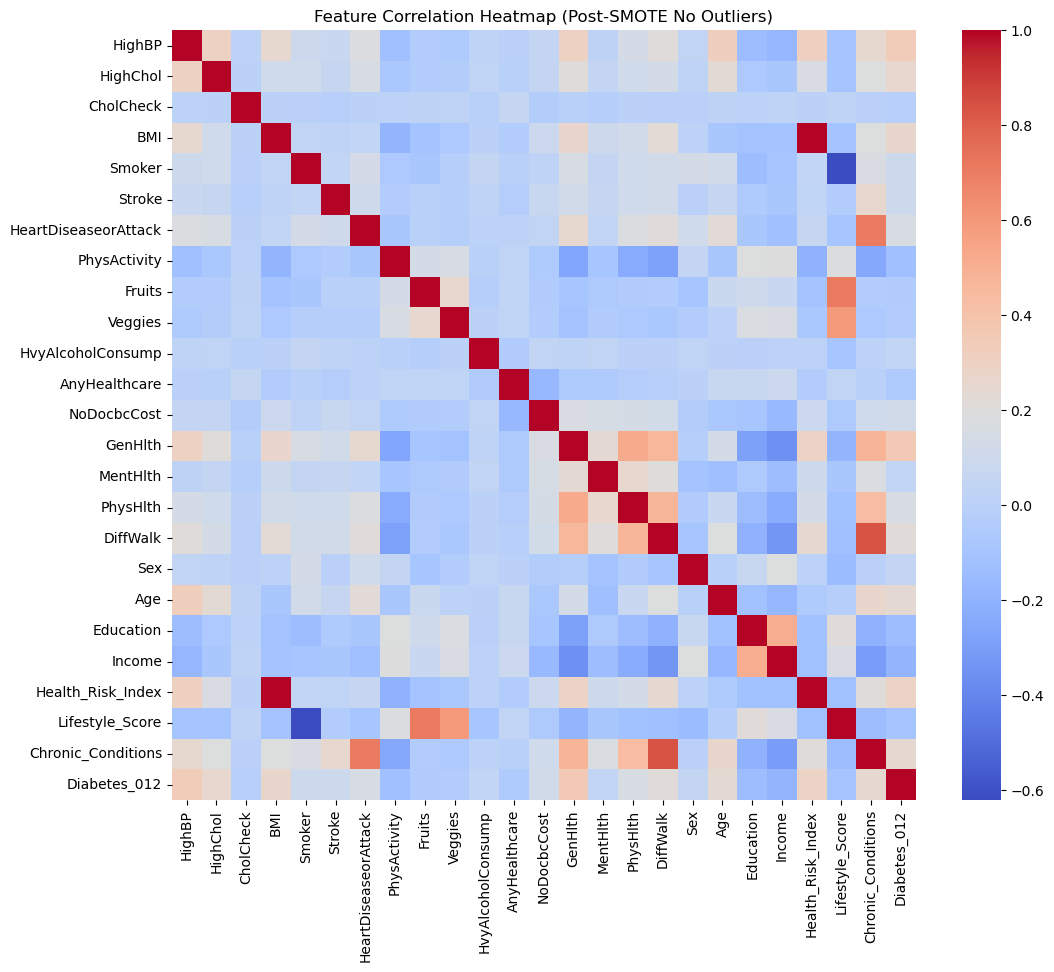

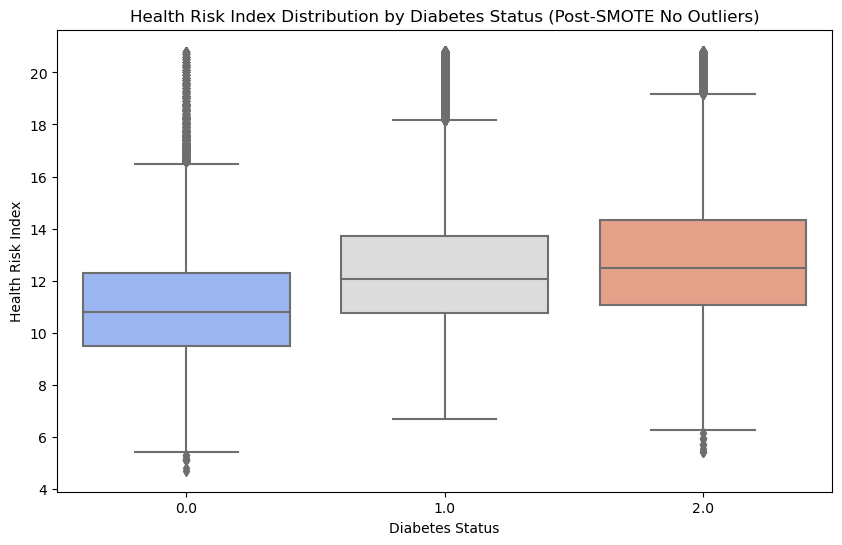

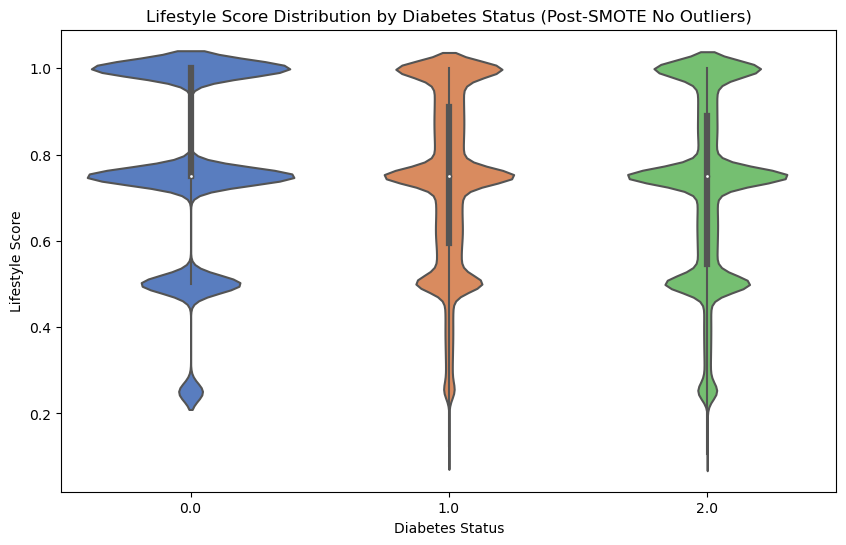

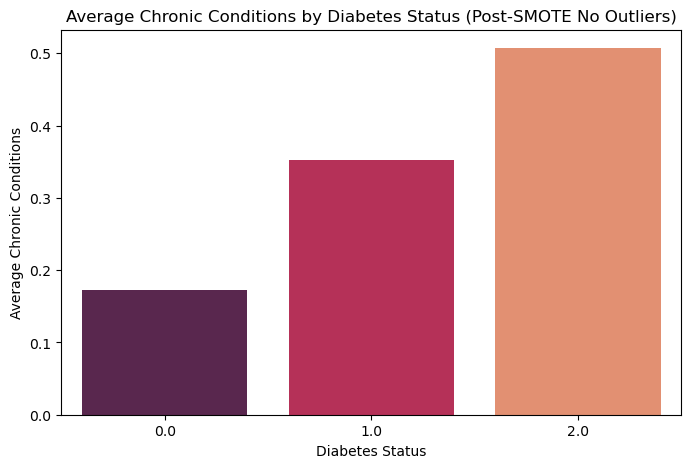

In [14]:
# Use the Post-SMOTE No Outliers Dataset
df = X_train_post_no_outliers.copy()
df['Diabetes_012'] = y_train_post_no_outliers

# 2. Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (Post-SMOTE No Outliers)')
plt.show()

# 3. Health Risk Index and Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='Health_Risk_Index', data=df, palette='coolwarm')
plt.title('Health Risk Index Distribution by Diabetes Status (Post-SMOTE No Outliers)')
plt.xlabel('Diabetes Status')
plt.ylabel('Health Risk Index')
plt.show()

# 4. Lifestyle Score and Diabetes Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y='Lifestyle_Score', data=df, palette='muted', split=True)
plt.title('Lifestyle Score Distribution by Diabetes Status (Post-SMOTE No Outliers)')
plt.xlabel('Diabetes Status')
plt.ylabel('Lifestyle Score')
plt.show()

# 5. Chronic Conditions Indicator
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Diabetes_012',
    y='Chronic_Conditions',
    data=df,
    errorbar=None,  # Replaces deprecated 'ci' parameter
    palette='rocket'
)
plt.title('Average Chronic Conditions by Diabetes Status (Post-SMOTE No Outliers)')
plt.xlabel('Diabetes Status')
plt.ylabel('Average Chronic Conditions')
plt.show()


--- Training Random Forest ---


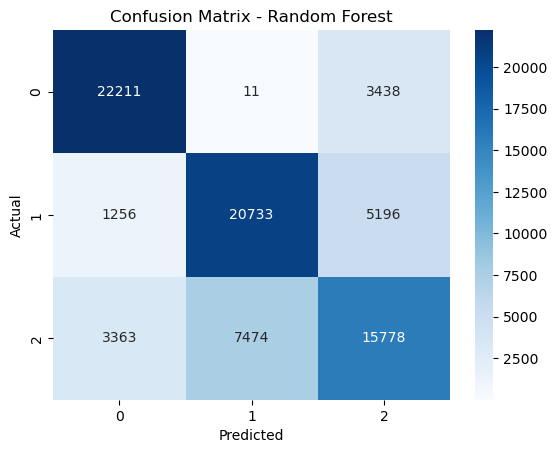

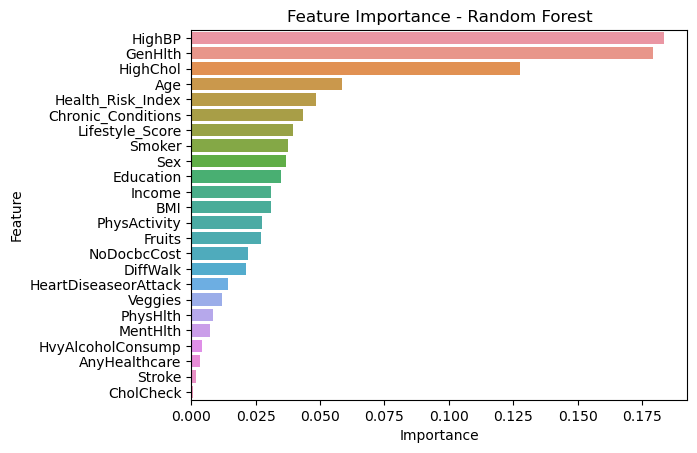


--- Training XGBoost ---


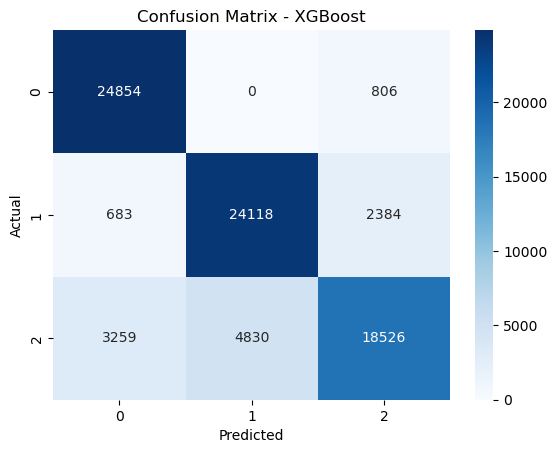

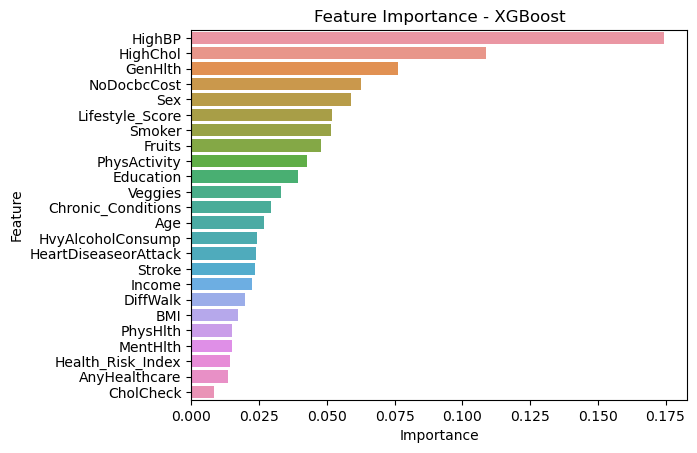


--- Training LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 317837, number of used features: 24
[LightGBM] [Info] Start training from score -1.130330
[LightGBM] [Info] Start training from score -1.072607
[LightGBM] [Info] Start training from score -1.093751


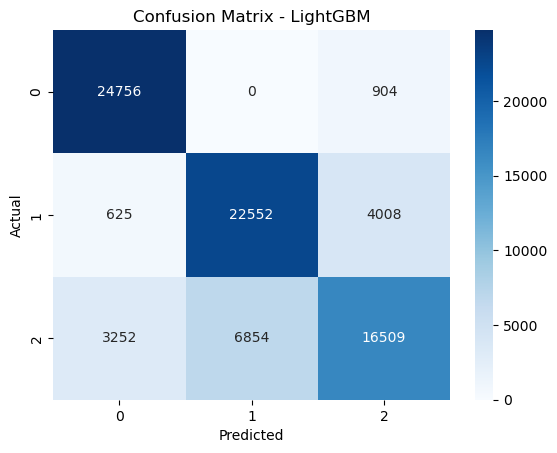

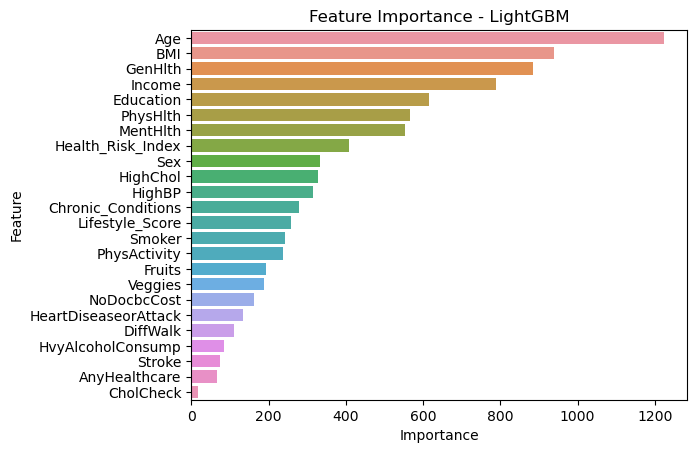

F-Statistic: 148.66679324618502, P-Value: 2.985832711345846e-65


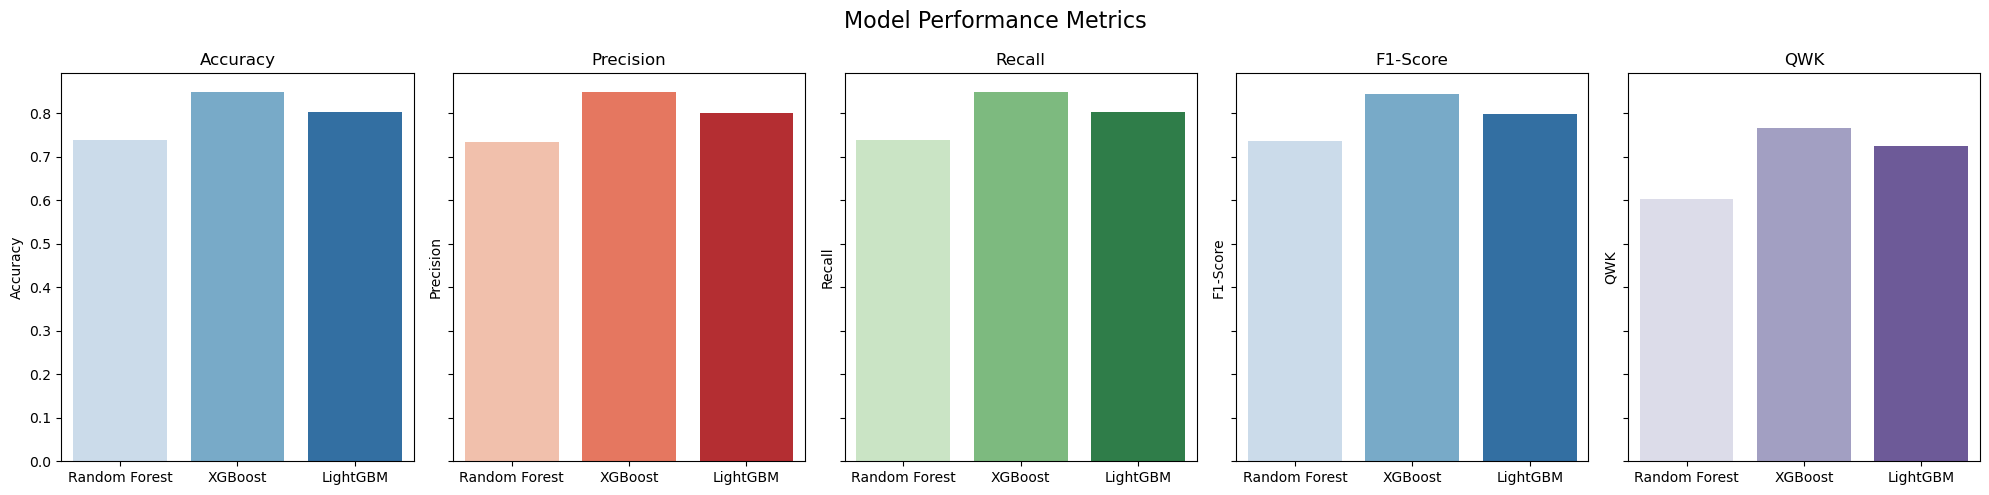

In [5]:
# Split features and target
X = diabetes_data.drop('Diabetes_012', axis=1)
y = diabetes_data['Diabetes_012']

# Split into pre-SMOTE train/test sets
X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_post, y_train_post = smote.fit_resample(X_train_pre, y_train_pre)

# Detect Outliers in Post-SMOTE Dataset
def detect_outliers(X_train_resampled, threshold=3):
    z_scores = X_train_resampled.apply(zscore)
    outliers = (z_scores.abs() > threshold).any(axis=1)
    return outliers

outliers = detect_outliers(X_train_post)
X_train_post_no_outliers = X_train_post[~outliers]
y_train_post_no_outliers = y_train_post[~outliers]

# Prepare the Post-SMOTE No Outliers dataset
X = X_train_post_no_outliers.copy()
y = y_train_post_no_outliers.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', random_state=42)
}

# Evaluate models and collect results
results = {}
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else np.nan
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    qwk = cohen_kappa_score(y_test, y_pred, weights="quadratic")
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "QWK": qwk,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Feature Importance
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Importance - {model_name}")
        plt.show()

# Statistical Significance Tests
all_predictions = [models[model].predict(X_test) for model in models]
f_stat, p_value = f_oneway(*all_predictions)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Create Performance Barplots
performance_df = pd.DataFrame(results).T
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "QWK"]
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5), sharey=True)
palette_dict = {"Accuracy": "Blues", "Precision": "Reds", "Recall": "Greens", "QWK": "Purples"}
for i, metric in enumerate(metrics):
    sns.barplot(x=performance_df.index, y=metric, data=performance_df, ax=axes[i], palette=palette_dict.get(metric, "Blues"))
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
plt.suptitle("Model Performance Metrics", fontsize=16)
plt.tight_layout()
plt.show()

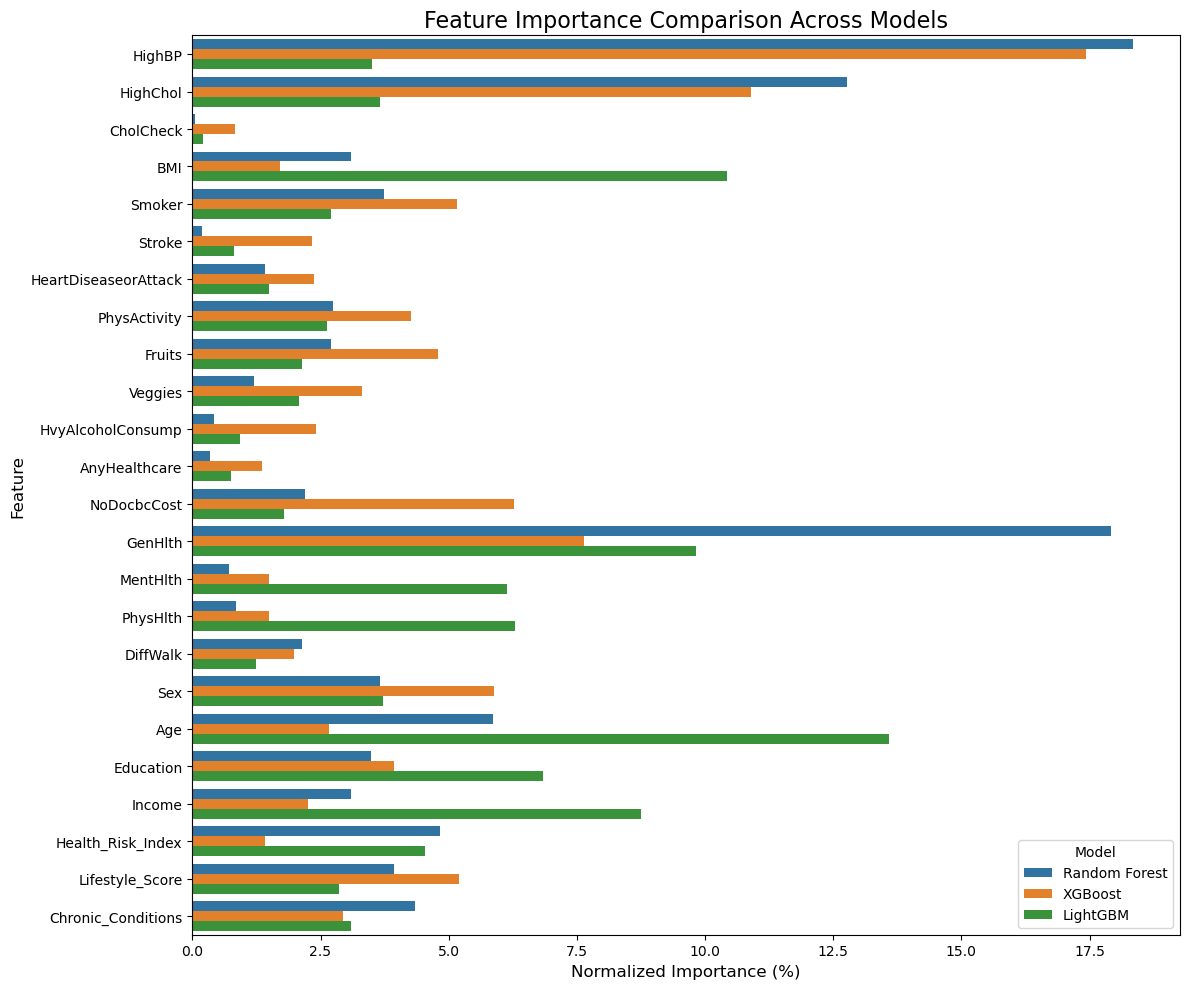

In [6]:
# Extract feature importances for each model
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Random Forest": models["Random Forest"].feature_importances_,
    "XGBoost": models["XGBoost"].feature_importances_,
    "LightGBM": models["LightGBM"].feature_importances_
})

# Normalize importances for comparability
for model in ["Random Forest", "XGBoost", "LightGBM"]:
    feature_importances[model] = 100 * feature_importances[model] / feature_importances[model].sum()

# Reshape data for plotting
feature_importances_melted = feature_importances.melt(
    id_vars="Feature",
    var_name="Model",
    value_name="Importance"
)

# Sort features by total importance (sum across all models)
feature_order = feature_importances.groupby("Feature").sum().sum(axis=1).sort_values(ascending=False).index

# Define a custom color palette for distinct colors
custom_palette = {
    "Random Forest": "#1f77b4",  # Blue
    "XGBoost": "#ff7f0e",        # Orange
    "LightGBM": "#2ca02c"        # Green
}

# Plot feature importances as a horizontal bar chart
plt.figure(figsize=(12, 10))
sns.barplot(
    data=feature_importances_melted,
    x="Importance",
    y="Feature",
    hue="Model",
    orient="h",
    palette=custom_palette
)
plt.title("Feature Importance Comparison Across Models", fontsize=16)
plt.xlabel("Normalized Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

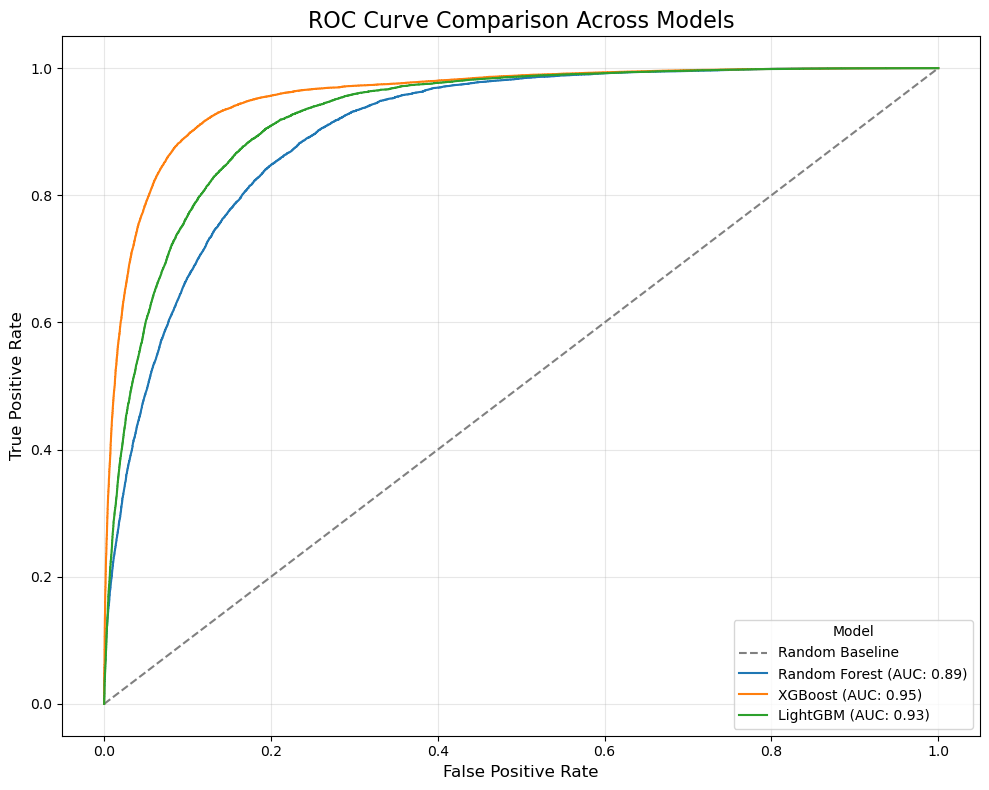

In [7]:
# Initialize the plot
plt.figure(figsize=(10, 8))

# Add a y=x line for baseline comparison
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Baseline')

# Loop through each model to compute and plot the ROC curve
for model_name in models:
    if hasattr(models[model_name], "predict_proba"):  # Check if the model has `predict_proba`
        y_prob = models[model_name].predict_proba(X_test)  # Predicted probabilities
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
        plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc:.2f})")
    elif hasattr(models[model_name], "decision_function"):  # For models like SVM
        y_score = models[model_name].decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC: {auc:.2f})")

# Formatting the plot
plt.title("ROC Curve Comparison Across Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(title="Model", loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


--- Evaluating XGBoost ---
Number of Trees: 50, Mean CV Accuracy: 0.8091
Number of Trees: 100, Mean CV Accuracy: 0.8483
Number of Trees: 200, Mean CV Accuracy: 0.8809
Number of Trees: 400, Mean CV Accuracy: 0.9067
Number of Trees: 600, Mean CV Accuracy: 0.9174
Number of Trees: 800, Mean CV Accuracy: 0.9230
Number of Trees: 1000, Mean CV Accuracy: 0.9264

--- Evaluating LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 317837, number of used features: 24
[LightGBM] [Info] Start training from score -1.130330
[LightGBM] [Info] Start training from score -1.072607
[LightGBM] [Info] Start training from score -1.093751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024263 sec

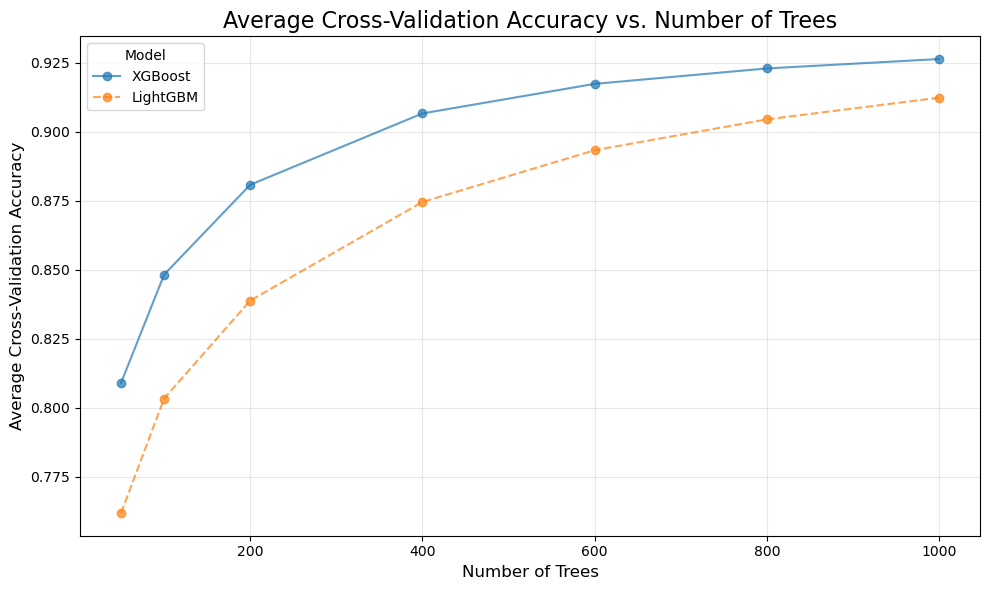

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Define the number of trees to evaluate
num_trees = [50, 100, 200, 400, 600, 800, 1000]

# Initialize lists to store results
xgb_accuracies = []
lgbm_accuracies = []

# Perform cross-validation for XGBoost
print("\n--- Evaluating XGBoost ---")
for n_estimators in num_trees:
    xgb_model = XGBClassifier(n_estimators=n_estimators, eval_metric='mlogloss', random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=skf, scoring="accuracy")
    xgb_accuracies.append(np.mean(xgb_cv_scores))
    print(f"Number of Trees: {n_estimators}, Mean CV Accuracy: {np.mean(xgb_cv_scores):.4f}")

# Perform cross-validation for LightGBM
print("\n--- Evaluating LightGBM ---")
for n_estimators in num_trees:
    lgbm_model = LGBMClassifier(n_estimators=n_estimators, boosting_type='gbdt', random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    lgbm_cv_scores = cross_val_score(lgbm_model, X, y, cv=skf, scoring="accuracy")
    lgbm_accuracies.append(np.mean(lgbm_cv_scores))
    print(f"Number of Trees: {n_estimators}, Mean CV Accuracy: {np.mean(lgbm_cv_scores):.4f}")

# Plot results for XGBoost and LightGBM
plt.figure(figsize=(10, 6))
plt.plot(num_trees, xgb_accuracies, marker='o', label="XGBoost", linestyle='-', alpha=0.7)
plt.plot(num_trees, lgbm_accuracies, marker='o', label="LightGBM", linestyle='--', alpha=0.7)
plt.title("Average Cross-Validation Accuracy vs. Number of Trees", fontsize=16)
plt.xlabel("Number of Trees", fontsize=12)
plt.ylabel("Average Cross-Validation Accuracy", fontsize=12)
plt.legend(title="Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


--- Evaluating Random Forest with Varying Number of Features ---
Number of Features: 1, Mean CV Accuracy: 0.9367
Number of Features: 2, Mean CV Accuracy: 0.9361
Number of Features: 3, Mean CV Accuracy: 0.9357
Number of Features: 4, Mean CV Accuracy: 0.9352
Number of Features: 5, Mean CV Accuracy: 0.9344
Number of Features: 6, Mean CV Accuracy: 0.9343
Number of Features: 7, Mean CV Accuracy: 0.9340
Number of Features: 8, Mean CV Accuracy: 0.9333
Number of Features: 9, Mean CV Accuracy: 0.9328
Number of Features: 10, Mean CV Accuracy: 0.9323
Number of Features: 11, Mean CV Accuracy: 0.9321
Number of Features: 12, Mean CV Accuracy: 0.9316
Number of Features: 13, Mean CV Accuracy: 0.9311
Number of Features: 14, Mean CV Accuracy: 0.9310
Number of Features: 15, Mean CV Accuracy: 0.9299
Number of Features: 16, Mean CV Accuracy: 0.9298
Number of Features: 17, Mean CV Accuracy: 0.9294
Number of Features: 18, Mean CV Accuracy: 0.9287
Number of Features: 19, Mean CV Accuracy: 0.9283
Number of Fe

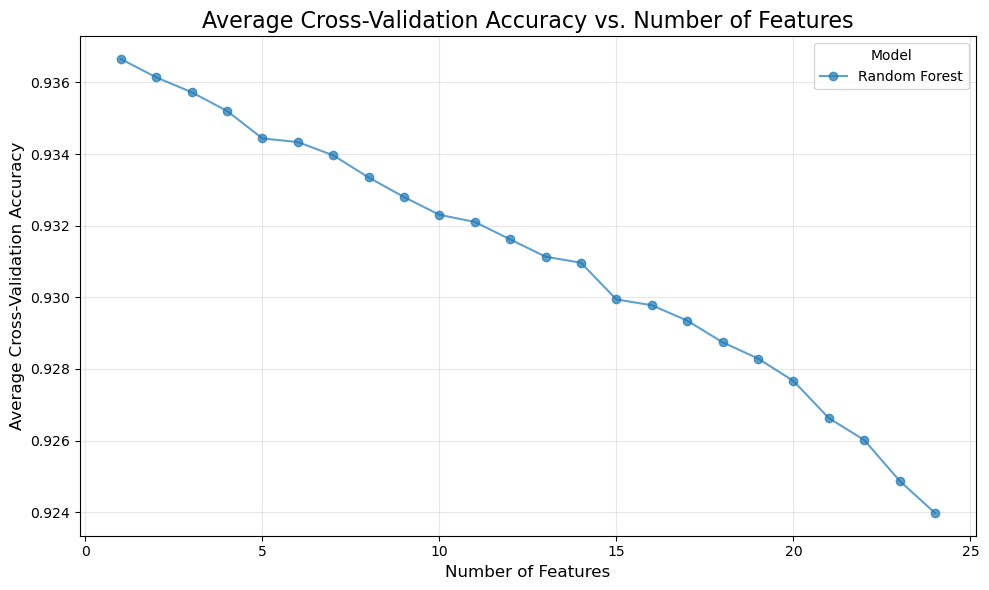

In [9]:
# Define the number of features to evaluate
num_features = list(range(1, X.shape[1] + 1))

# Initialize a list to store results
rf_feature_accuracies = []

# Perform cross-validation for Random Forest with different max_features
print("\n--- Evaluating Random Forest with Varying Number of Features ---")
for max_features in num_features:
    rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rf_cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring="accuracy")
    rf_feature_accuracies.append(np.mean(rf_cv_scores))
    print(f"Number of Features: {max_features}, Mean CV Accuracy: {np.mean(rf_cv_scores):.4f}")

# Plot results for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(num_features, rf_feature_accuracies, marker='o', label="Random Forest", linestyle='-', alpha=0.7)
plt.title("Average Cross-Validation Accuracy vs. Number of Features", fontsize=16)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Average Cross-Validation Accuracy", fontsize=12)
plt.legend(title="Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Function to create a clean table for a specific model
def create_model_table(results, model_name):
    model_data = results[model_name]
    table = pd.DataFrame([model_data], index=[model_name])
    table.index.name = "Model"
    table.reset_index(inplace=True)
    table = table[[
        "Model", "Accuracy", "Precision", "Recall",
        "F1-Score", "ROC AUC", "QWK", "MAE", "MSE", "R2"
    ]]
    table = table.round(4)  # Round numbers for clarity
    return table

# Create tables for each model
random_forest_table = create_model_table(results, "Random Forest")
xgboost_table = create_model_table(results, "XGBoost")
lightgbm_table = create_model_table(results, "LightGBM")

# Display formatted tables for each model
print("\n--- Random Forest Model Statistics ---")
display(random_forest_table)

print("\n--- XGBoost Model Statistics ---")
display(xgboost_table)

print("\n--- LightGBM Model Statistics ---")
display(lightgbm_table)


--- Random Forest Model Statistics ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,QWK,MAE,MSE,R2
0,Random Forest,0.739,0.7352,0.739,0.7365,0.8909,0.6028,0.3466,0.5178,0.2128



--- XGBoost Model Statistics ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,QWK,MAE,MSE,R2
0,XGBoost,0.8495,0.8495,0.8495,0.8455,0.9514,0.7654,0.2017,0.304,0.5378



--- LightGBM Model Statistics ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,QWK,MAE,MSE,R2
0,LightGBM,0.8031,0.7997,0.8031,0.7974,0.9268,0.7258,0.2492,0.3538,0.4621



--- Permutation Importance for Random Forest ---


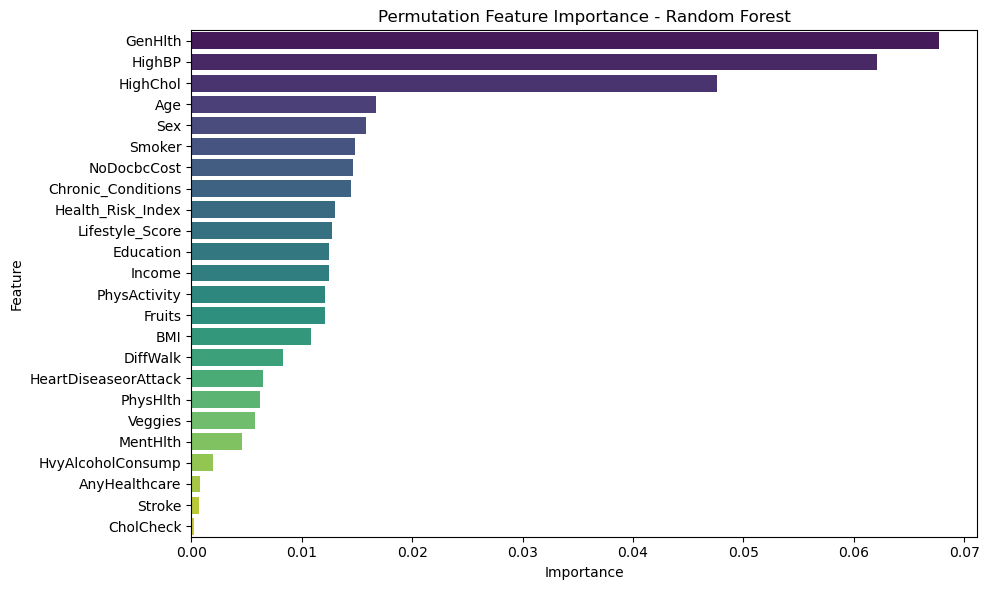


--- Permutation Importance for XGBoost ---


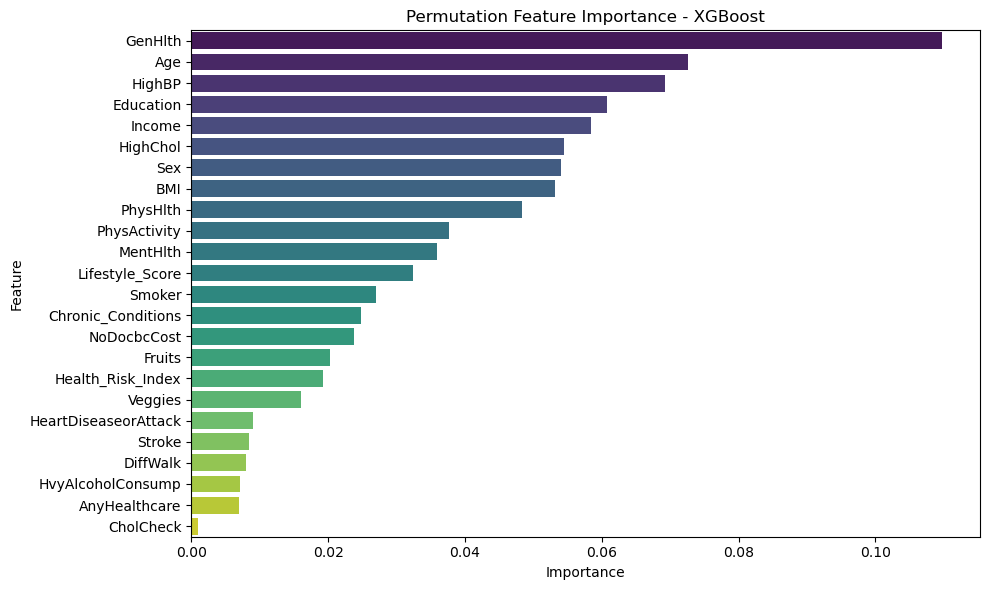


--- Permutation Importance for LightGBM ---


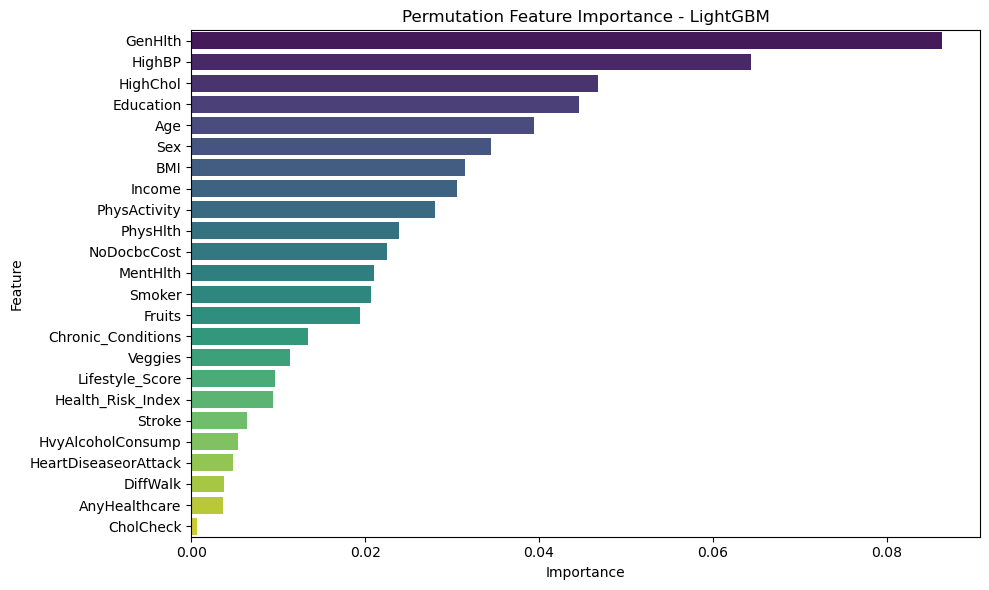

In [20]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Function to calculate and plot permutation feature importance
def plot_permutation_importance(model, X_test, y_test, model_name):
    print(f"\n--- Permutation Importance for {model_name} ---")
    
    # Compute permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy", n_repeats=5, random_state=42)
    
    # Convert to DataFrame for easier plotting
    importance_df = pd.DataFrame({
        "Feature": X_test.columns,
        "Importance": perm_importance.importances_mean
    }).sort_values(by="Importance", ascending=False)
    
    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="Importance", 
        y="Feature", 
        data=importance_df, 
        palette="viridis"
    )
    plt.title(f"Permutation Feature Importance - {model_name}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
    
    # Return importance data for further analysis if needed
    return importance_df

# Apply to each model
for model_name, model in models.items():
    plot_permutation_importance(model, X_test, y_test, model_name)

In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

# Ensure you are using the Post-SMOTE No Outliers dataset
X = X_train_post_no_outliers.copy()
y = y_train_post_no_outliers.copy()

# Split the dataset for stacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
    ('lgbm', LGBMClassifier(boosting_type='gbdt', random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)

# Evaluate the stacking model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")

# Print evaluation metrics
print("\n--- Stacking Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance from Base Models
for name, model in base_models:
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)
        sns.barplot(x="Importance", y="Feature", data=importance_df)
        plt.title(f"Feature Importance - {name.upper()}")
        plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 317837, number of used features: 24
[LightGBM] [Info] Start training from score -1.130330
[LightGBM] [Info] Start training from score -1.072607
[LightGBM] [Info] Start training from score -1.093751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 254269, number of used features: 24
[LightGBM] [Info] Start training from score -1.130333
[LightGBM] [Info] Start training from score -1.072600
[LightGBM] [Info] Star

/Users/praveenpuviindran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Stacking Model Evaluation ---
Accuracy: 0.8547
Precision: 0.8530
Recall: 0.8547
F1-Score: 0.8524
ROC AUC: 0.9557

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     25660
         1.0       0.86      0.87      0.86     27185
         2.0       0.83      0.74      0.78     26615

    accuracy                           0.85     79460
   macro avg       0.85      0.86      0.85     79460
weighted avg       0.85      0.85      0.85     79460



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 317837, number of used features: 24
[LightGBM] [Info] Start training from score -1.130330
[LightGBM] [Info] Start training from score -1.072607
[LightGBM] [Info] Start training from score -1.093751


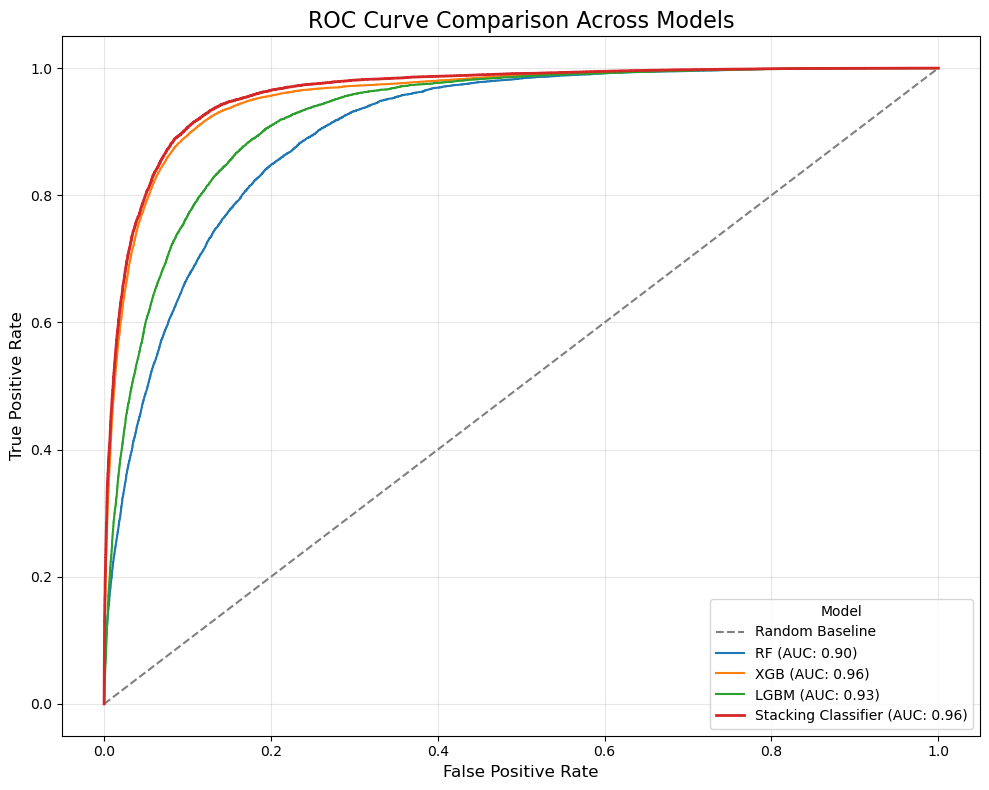

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit each base model individually
fitted_base_models = []
for name, model in base_models:
    model.fit(X_train, y_train)
    fitted_base_models.append((name, model))

# Plot the ROC Curve for base models and stacking classifier
plt.figure(figsize=(10, 8))

# Add a y=x line for baseline comparison
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Baseline")

# Loop through each individually fitted base model to compute and plot the ROC curve
for name, model in fitted_base_models:
    if hasattr(model, "predict_proba"):
        base_prob = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, base_prob[:, 1], pos_label=1)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name.upper()} (AUC: {auc_score:.2f})")

# Add Stacking Classifier to the ROC Curve
if hasattr(stacking_clf, "predict_proba"):
    stack_fpr, stack_tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    stack_auc = auc(stack_fpr, stack_tpr)
    plt.plot(stack_fpr, stack_tpr, label=f"Stacking Classifier (AUC: {stack_auc:.2f})", linewidth=2)

# Formatting the plot
plt.title("ROC Curve Comparison Across Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(title="Model")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0                   RF  0.739013   0.735191  0.739013  0.736490  0.890867
1                  XGB  0.849459   0.849507  0.849459  0.845546  0.951394
2                 LGBM  0.803134   0.799726  0.803134  0.797400  0.926800
3  STACKING CLASSIFIER  0.854656   0.853049  0.854656  0.852397  0.955690


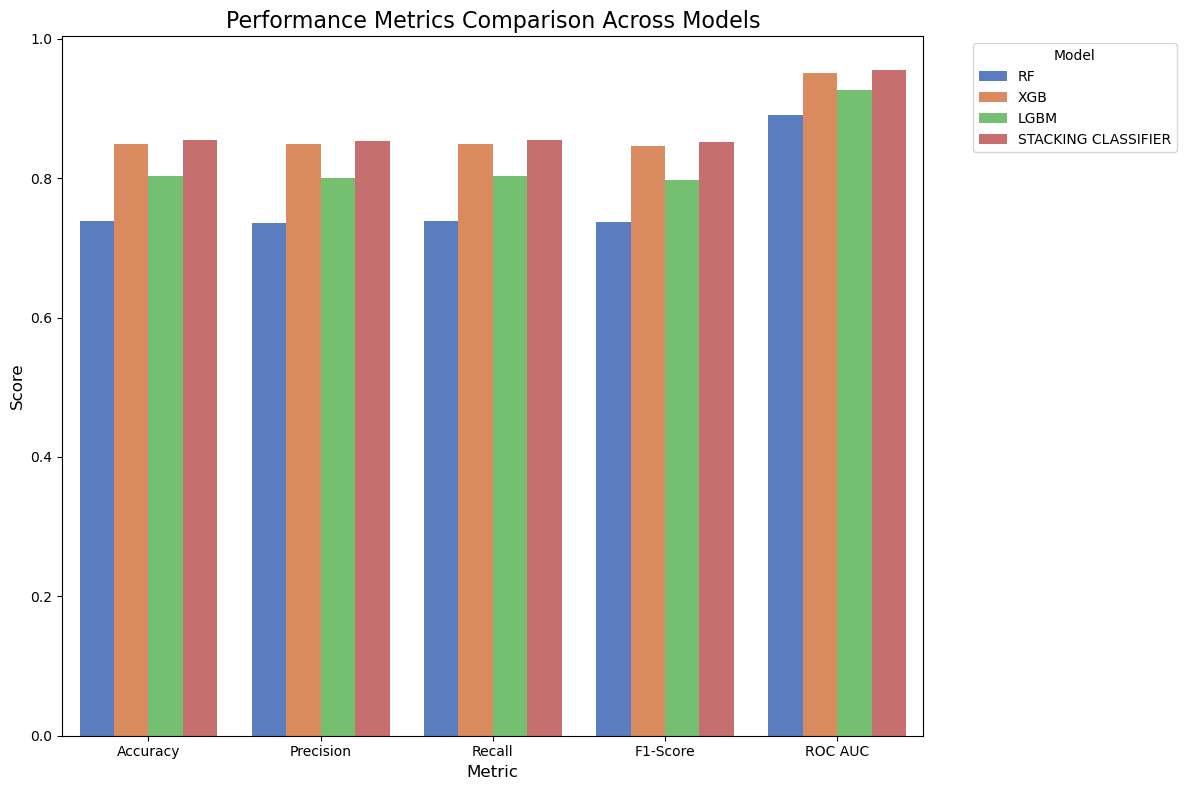

In [28]:
# Collect performance metrics for each model
performance_data = []

# Add metrics for each base model
for name, model in fitted_base_models:
    y_pred_base = model.predict(X_test)
    y_prob_base = model.predict_proba(X_test)
    metrics = {
        "Model": name.upper(),
        "Accuracy": accuracy_score(y_test, y_pred_base),
        "Precision": precision_score(y_test, y_pred_base, average="weighted", zero_division=1),
        "Recall": recall_score(y_test, y_pred_base, average="weighted", zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_base, average="weighted"),
        "ROC AUC": roc_auc_score(y_test, y_prob_base, multi_class="ovr"),
    }
    performance_data.append(metrics)

# Add metrics for the stacking model
metrics = {
    "Model": "STACKING CLASSIFIER",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC AUC": roc_auc,
}
performance_data.append(metrics)

# Convert performance metrics to a DataFrame
performance_df = pd.DataFrame(performance_data)
print(performance_df)
# Bar plot for performance metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]
performance_melted = performance_df.melt(id_vars="Model", value_vars=metrics_to_plot, var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 8))
sns.barplot(
    data=performance_melted,
    x="Metric",
    y="Score",
    hue="Model",
    palette="muted",
)
plt.title("Performance Metrics Comparison Across Models", fontsize=16)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

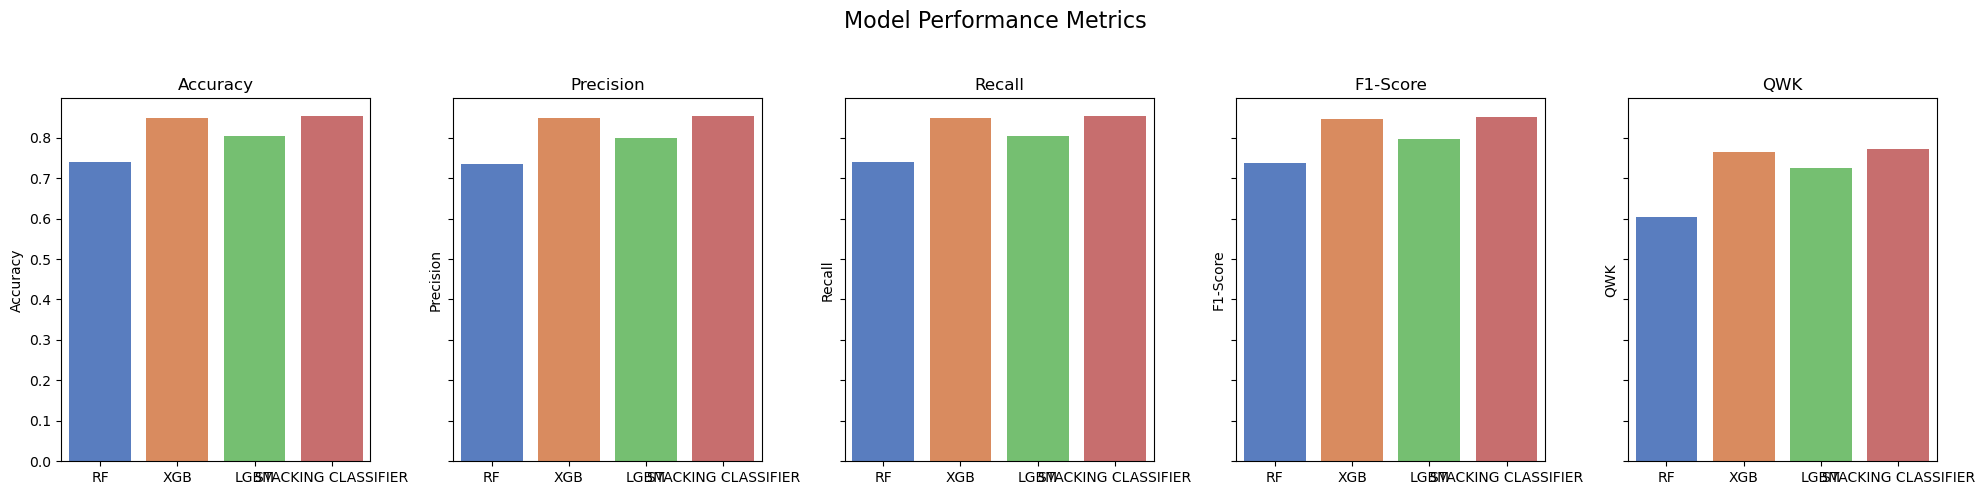

In [29]:
# Collect performance metrics for each model
performance_data = []

# Add metrics for each base model
for name, model in fitted_base_models:
    y_pred_base = model.predict(X_test)
    y_prob_base = model.predict_proba(X_test)
    metrics = {
        "Model": name.upper(),
        "Accuracy": accuracy_score(y_test, y_pred_base),
        "Precision": precision_score(y_test, y_pred_base, average="weighted", zero_division=1),
        "Recall": recall_score(y_test, y_pred_base, average="weighted", zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_base, average="weighted"),
        "QWK": cohen_kappa_score(y_test, y_pred_base, weights="quadratic"),
    }
    performance_data.append(metrics)

# Add metrics for the stacking model
metrics = {
    "Model": "STACKING CLASSIFIER",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "QWK": cohen_kappa_score(y_test, y_pred, weights="quadratic"),
}
performance_data.append(metrics)

# Convert performance metrics to a DataFrame
performance_df = pd.DataFrame(performance_data)

# Plot performance metrics in the format shown in your screenshot
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "QWK"]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(20, 5), sharey=True)
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(
        data=performance_df,
        x="Model",
        y=metric,
        ax=axes[i],
        palette=sns.color_palette("muted"),
    )
    axes[i].set_title(metric)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(metric)

plt.suptitle("Model Performance Metrics", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


--- Permutation Feature Importance for Stacked Model ---


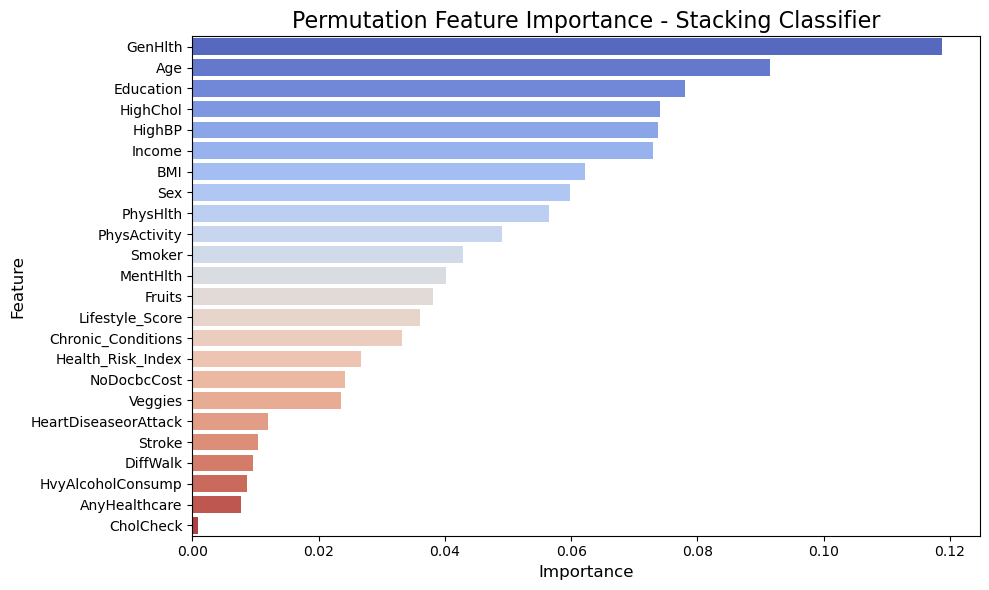

In [30]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for the stacking model
print("\n--- Permutation Feature Importance for Stacked Model ---")
perm_importance = permutation_importance(stacking_clf, X_test, y_test, scoring="accuracy", n_repeats=5, random_state=42)

# Convert to DataFrame for plotting
stacked_importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=stacked_importance_df,
    palette="coolwarm"
)
plt.title("Permutation Feature Importance - Stacking Classifier", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


In [31]:
# Function to create a clean table for a specific model (already defined)
def create_model_table(results, model_name):
    model_data = results[model_name]
    table = pd.DataFrame([model_data], index=[model_name])
    table.index.name = "Model"
    table.reset_index(inplace=True)
    table = table[[
        "Model", "Accuracy", "Precision", "Recall",
        "F1-Score", "ROC AUC", "QWK", "MAE", "MSE", "R2"
    ]]
    table = table.round(4)  # Round numbers for clarity
    return table

# Add the stacked model metrics to the results dictionary
results["Stacked Model"] = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC AUC": roc_auc,
    "QWK": cohen_kappa_score(y_test, y_pred, weights="quadratic"),
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "R2": r2_score(y_test, y_pred)
}

# Create table for the stacked model
stacked_table = create_model_table(results, "Stacked Model")

# Display the stacked model table
print("\n--- Stacked Model Statistics ---")
display(stacked_table)


--- Stacked Model Statistics ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,QWK,MAE,MSE,R2
0,Stacked Model,0.8547,0.853,0.8547,0.8524,0.9557,0.7719,0.1968,0.2998,0.5443


In [32]:
# Combine all results into one DataFrame
all_models_table = pd.concat(
    [
        create_model_table(results, "Random Forest"),
        create_model_table(results, "XGBoost"),
        create_model_table(results, "LightGBM"),
        stacked_table
    ],
    ignore_index=True
)

# Display the consolidated table
print("\n--- Consolidated Model Statistics ---")
display(all_models_table)


--- Consolidated Model Statistics ---


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC,QWK,MAE,MSE,R2
0,Random Forest,0.7390,0.7352,0.7390,0.7365,0.8909,0.6028,0.3466,0.5178,0.2128
1,XGBoost,0.8495,0.8495,0.8495,0.8455,0.9514,0.7654,0.2017,0.3040,0.5378
2,LightGBM,0.8031,0.7997,0.8031,0.7974,0.9268,0.7258,0.2492,0.3538,0.4621
3,Stacked Model,0.8547,0.8530,0.8547,0.8524,0.9557,0.7719,0.1968,0.2998,0.5443



Correlation between Income and Education:
             Income  Education
Income     1.000000   0.506569
Education  0.506569   1.000000


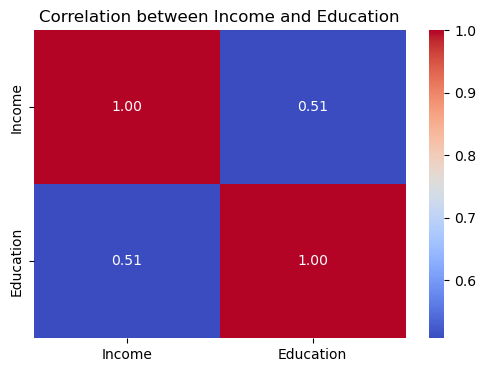

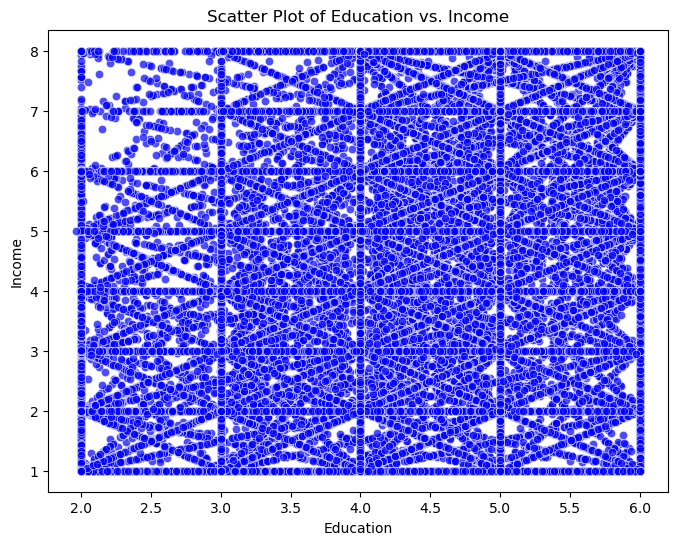

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the dataset is the Post-SMOTE No Outliers dataset
df = X_train_post_no_outliers.copy()
df['Diabetes_012'] = y_train_post_no_outliers

# Compute the correlation matrix for Income and Education
correlation = df[['Income', 'Education']].corr()

# Print the correlation value
print("\nCorrelation between Income and Education:")
print(correlation)

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation between Income and Education')
plt.show()

# Scatter plot to visualize relationship between Income and Education
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Education', y='Income', alpha=0.7, color='blue')
plt.title('Scatter Plot of Education vs. Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()